In [1]:
import pandas as pd
# the bare minimum
import matplotlib.pyplot as plt
import geopandas as gpd

# more advanced
import pyogrio as ogr
from sklearn.cluster import KMeans
from lonboard import Map, PolygonLayer
from lonboard.colormap import apply_categorical_cmap, apply_continuous_cmap
from palettable.colorbrewer.sequential import PuRd_9
from matplotlib.colors import LogNorm

import pydeck as pdk

In [2]:
file_path = r"C:\Users\daiyu\Documents\GitHub\colloquium_summer24\data\zillow_home_values.csv"
df = pd.read_csv(file_path)
print(df)

       RegionID  SizeRank  RegionName RegionType StateName State        City  \
0         91982         1       77494        zip        TX    TX        Katy   
1         61148         2        8701        zip        NJ    NJ    Lakewood   
2         91940         3       77449        zip        TX    TX        Katy   
3         62080         4       11368        zip        NY    NY    New York   
4         91733         5       77084        zip        TX    TX     Houston   
...         ...       ...         ...        ...       ...   ...         ...   
26339     63527     39992       14441        zip        NY    NY     Dresden   
26340     64705     39992       16682        zip        PA    PA      Sproul   
26341     78282     39992       46799        zip        IN    IN  Zanesville   
26342     67377     39992       22731        zip        VA    VA       Aroda   
26343     80861     39992       52163        zip        IA    IA    Protivin   

                                       

In [15]:
zip_10025 = df[df['RegionName'] == 10025]

In [16]:
print(zip_10025)

   RegionID  SizeRank  RegionName RegionType StateName State      City  \
0     61639        29       10025        zip        NY    NY  New York   

                                   Metro       CountyName     2000-01-31  ...  \
0  New York-Newark-Jersey City, NY-NJ-PA  New York County  338300.813486  ...   

     2023-09-30    2023-10-31    2023-11-30    2023-12-31    2024-01-31  \
0  1.041671e+06  1.036203e+06  1.031752e+06  1.031483e+06  1.031787e+06   

     2024-02-29    2024-03-31    2024-04-30    2024-05-31    2024-06-30  
0  1.031756e+06  1.028695e+06  1.028509e+06  1.026235e+06  1.027704e+06  

[1 rows x 303 columns]


In [8]:
zip_10025.to_csv('zip_10025_price.csv', index=False)

In [9]:
df = pd.read_csv('zip_10025_price.csv')

In [10]:
print(df.head())

   RegionID  SizeRank  RegionName RegionType StateName State      City  \
0     61639        29       10025        zip        NY    NY  New York   

                                   Metro       CountyName     2000-01-31  ...  \
0  New York-Newark-Jersey City, NY-NJ-PA  New York County  338300.813486  ...   

     2023-09-30    2023-10-31    2023-11-30    2023-12-31    2024-01-31  \
0  1.041671e+06  1.036203e+06  1.031752e+06  1.031483e+06  1.031787e+06   

     2024-02-29    2024-03-31    2024-04-30    2024-05-31    2024-06-30  
0  1.031756e+06  1.028695e+06  1.028509e+06  1.026235e+06  1.027704e+06  

[1 rows x 303 columns]


       city     2000-01-31     2000-02-29    2000-03-31     2000-04-30  \
0  New York  338300.813486  341953.000556  345515.78578  353189.453809   

      2000-05-31     2000-06-30     2000-07-31     2000-08-31    2000-09-30  \
0  360920.553073  368431.156611  376814.033866  384535.012081  391535.34137   

   ...    2023-09-30    2023-10-31    2023-11-30    2023-12-31    2024-01-31  \
0  ...  1.041671e+06  1.036203e+06  1.031752e+06  1.031483e+06  1.031787e+06   

     2024-02-29    2024-03-31    2024-04-30    2024-05-31    2024-06-30  
0  1.031756e+06  1.028695e+06  1.028509e+06  1.026235e+06  1.027704e+06  

[1 rows x 295 columns]


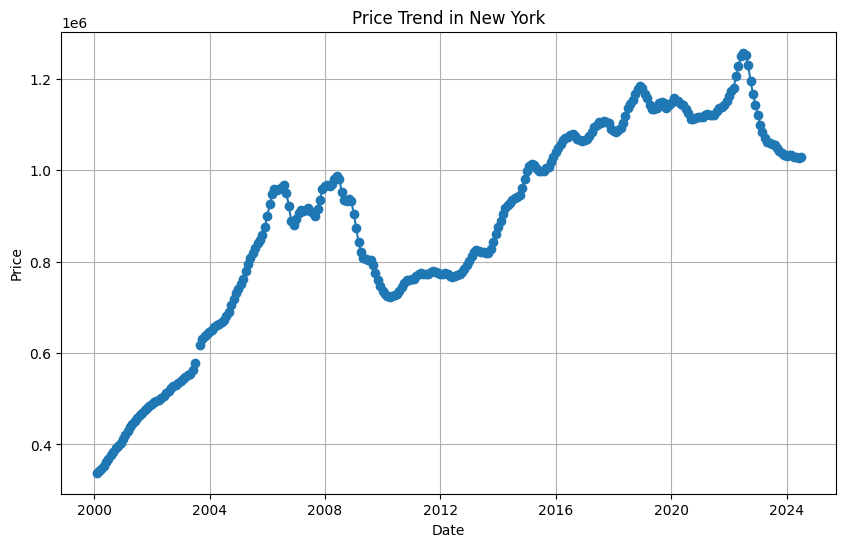

In [22]:

df = pd.read_csv(r"C:\Users\daiyu\Documents\GitHub\colloquium_summer24\price_trend\zip_10025_price.csv")

# Display the first few rows of the dataset
print(df.head())

# Select the city of interest
city = 'New York'  # Change to your city of interest

# Filter the data for the selected city
filtered_df = df[df['city'] == city]

# Transpose the DataFrame (switch rows and columns)
transposed_df = filtered_df.set_index('city').T

# Reset index to get 'Date' as a column
transposed_df.reset_index(inplace=True)
transposed_df.rename(columns={'index': 'Date', city: 'Price'}, inplace=True)

# Ensure the Date column is in datetime format
transposed_df['Date'] = pd.to_datetime(transposed_df['Date'])

# Plotting the price trend
plt.figure(figsize=(10, 6))
plt.plot(transposed_df['Date'], transposed_df['Price'], marker='o')
plt.title(f'Price Trend in {city}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()
